In [1]:
%matplotlib inline
from __future__ import division
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import common
import notebook_helpers

FS = (10, 7)

om = notebook_helpers.get_frame()
lyr = notebook_helpers.get_frame(having_lyrics=True)

In [2]:
print "Loaded {:,} songs, of which {:.1%} are scraped".format(
    len(om), om['scraped'].mean()
)

genred = om[~om['genre'].isnull()]
print "{:,} songs have a genre label ({:.1%}). {:,} are scraped and have genre".format(
    len(genred), len(genred)/len(om), genred['scraped'].sum()
)

Loaded 27,519 songs, of which 53.6% are scraped
6,434 songs have a genre label (23.4%). 4,749 are scraped and have genre


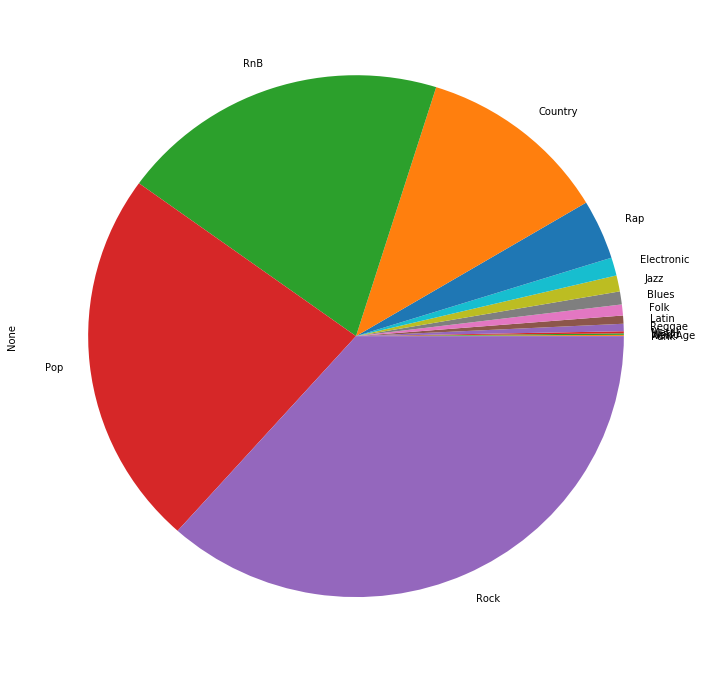

In [3]:
ax = genred.groupby('genre').size().sort_values().plot.pie(figsize=(12,12))

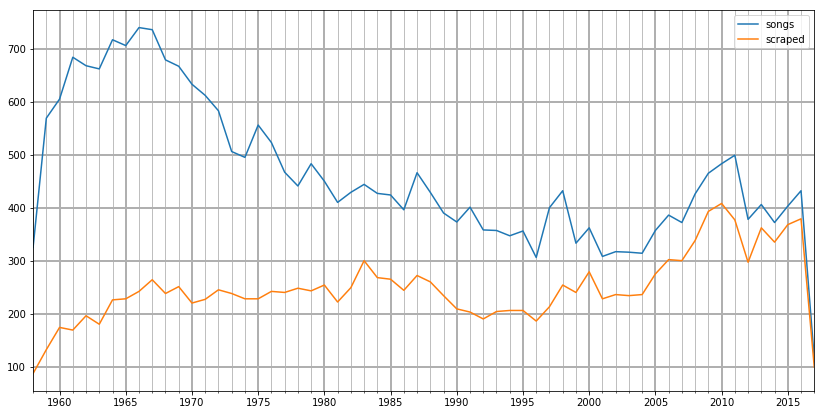

In [4]:
songs_per_year = om.groupby('year').size()
scraped_per_year = lyr.groupby('year').size()
fig, ax = plt.subplots(figsize=(14, 7))
yrs = songs_per_year.index
ax.plot(songs_per_year.index, songs_per_year.values, label='songs')
ax.plot(scraped_per_year.index, scraped_per_year.values, label='scraped')
ax.set_xticks([yr for yr in songs_per_year.index if yr%5 == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.grid(which='minor');
ax.grid(which='major', lw=2);
ax.set_xlim(yrs.min(), yrs.max());
ax.legend();

8 outliers fall outside the histogram (0 ratios < min=1, 8 ratios > max=9)


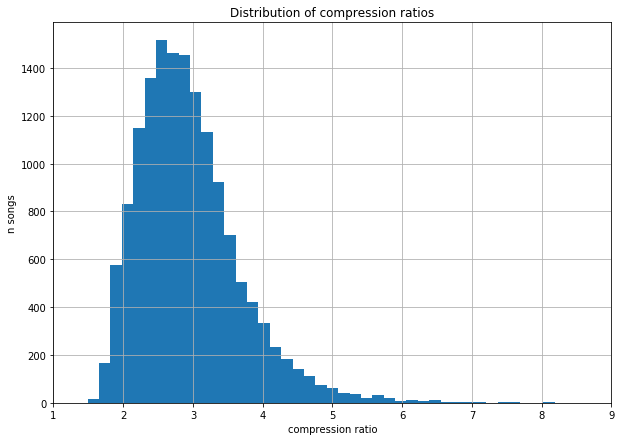

In [5]:
#ax = lyr['ratio'].plot.hist(figsize=FS)
xmax = 9
xmin = 1
nbins = 50
ax = lyr['ratio'].hist(bins=np.linspace(xmin,xmax,nbins), figsize=FS)
toosmall = (lyr['ratio'] < xmin).sum()
toobig = (lyr['ratio'] > xmax).sum()
print "{} outliers fall outside the histogram ({} ratios < min={}, {} ratios > max={})".format(
    toosmall+toobig, toosmall, xmin, toobig, xmax
)
ax.set_xlim(xmin, xmax);
ax.set_xlabel('compression ratio')
ax.set_ylabel('n songs');
ax.set_title('Distribution of compression ratios');

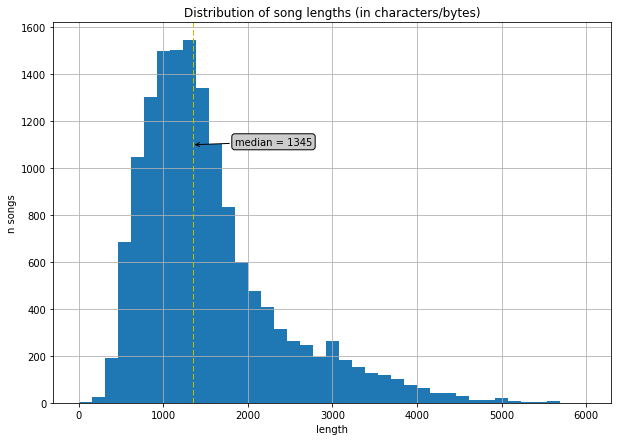

In [6]:
from matplotlib.transforms import blended_transform_factory as btf
xmin = 0
xmax = 6000
nbins = 40
ax = lyr['raw'].hist(figsize=FS, bins=np.linspace(xmin, xmax, nbins))
med = lyr['raw'].median()
ax.vlines([med], 0, 1, transform=btf(ax.transData, ax.transAxes), 
          colors='y', label='median', lw=1, linestyle='--')
ylab = 1100
ax.annotate('median = {:.0f}'.format(med), 
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->"),
            xy=(med, ylab), xytext=(med+500, ylab)
)
ax.set_title('Distribution of song lengths (in characters/bytes)')
ax.set_ylabel('n songs')
ax.set_xlabel('length');

In [7]:
n = 10
print "Most repetitive songs"
cols = ['artist', 'title', 'date', 'raw', 'comp', 'ratio', 'raw_ratio']
lyr[cols].sort_values(by='ratio', ascending=0).head(n)

Most repetitive songs


,artist,title,date,raw,comp,ratio,raw_ratio
25561,Daft Punk,Around The World,1997-08-30,2610.0,74.0,47.454545,35.270270
4163,Fatboy Slim,The Rockafeller Skank,1998-08-08,3382.0,171.0,22.250000,19.777778
15187,Jimmy Smith,Chain Of Fools (Part 1),1968-04-06,629.0,62.0,14.627907,10.145161
24292,Dillon Francis & DJ Snake,Get Low,2015-04-18,1060.0,106.0,12.183908,10.000000
540,Duck Sauce,Barbra Streisand,2011-05-14,1413.0,158.0,10.165468,8.943038
27493,Jose Feliciano,Feliz Navidad,2017-01-07,1358.0,155.0,9.985294,8.761290
6305,The Michael Zager Band,Let's All Chant,1978-03-04,1473.0,175.0,9.442308,8.417143
3665,KC And The Sunshine Band,Keep It Comin' Love,1977-07-30,1824.0,214.0,9.353846,8.523364
9745,Technotronic,Pump Up The Jam,1989-10-14,2714.0,323.0,8.927632,8.402477
9571,Silento,Watch Me,2015-03-14,2510.0,310.0,8.625430,8.096774


In [8]:
print "Least repetitive songs"
lyr[cols].sort_values(by='ratio', ascending=1).head(n)

Least repetitive songs


,artist,title,date,raw,comp,ratio,raw_ratio
6134,The Surfaris,Wipe Out,1963-06-22,20.0,35.0,1.250000,0.571429
21241,The Beach Boys,Surfin,1962-02-17,168.0,144.0,1.344000,1.166667
21847,The Yardbirds,I'm A Man,1965-10-30,249.0,183.0,1.518293,1.360656
14477,James Brown,Say It Loud - I'm Black And I'm Proud (Part 1),1968-09-07,280.0,199.0,1.555556,1.407035
7859,Barbra Streisand,Funny Girl,1964-09-12,391.0,263.0,1.602459,1.486692
914,Chicago,Lowdown,1971-05-08,343.0,233.0,1.602804,1.472103
4608,Perry Como,Tomboy,1959-02-28,439.0,292.0,1.608059,1.503425
94,Stacy Lattisaw,Miracles,1983-08-13,546.0,354.0,1.629851,1.542373
151,Nat King Cole,The Christmas Song (Merry Christmas To You),1960-12-17,609.0,392.0,1.632708,1.553571
21628,Heart,Dreamboat Annie,1976-12-18,394.0,260.0,1.634855,1.515385


In [9]:
print "Most repetitive songs (raw ratio)"
cols = ['artist', 'title', 'date', 'raw', 'comp', 'ratio', 'raw_ratio']
lyr[cols].sort_values(by='raw_ratio', ascending=0).head(n)

Most repetitive songs (raw ratio)


,artist,title,date,raw,comp,ratio,raw_ratio
25561,Daft Punk,Around The World,1997-08-30,2610.0,74.0,47.454545,35.270270
4163,Fatboy Slim,The Rockafeller Skank,1998-08-08,3382.0,171.0,22.250000,19.777778
15187,Jimmy Smith,Chain Of Fools (Part 1),1968-04-06,629.0,62.0,14.627907,10.145161
24292,Dillon Francis & DJ Snake,Get Low,2015-04-18,1060.0,106.0,12.183908,10.000000
540,Duck Sauce,Barbra Streisand,2011-05-14,1413.0,158.0,10.165468,8.943038
27493,Jose Feliciano,Feliz Navidad,2017-01-07,1358.0,155.0,9.985294,8.761290
3665,KC And The Sunshine Band,Keep It Comin' Love,1977-07-30,1824.0,214.0,9.353846,8.523364
6305,The Michael Zager Band,Let's All Chant,1978-03-04,1473.0,175.0,9.442308,8.417143
9745,Technotronic,Pump Up The Jam,1989-10-14,2714.0,323.0,8.927632,8.402477
9571,Silento,Watch Me,2015-03-14,2510.0,310.0,8.625430,8.096774


In [10]:
lyr[cols].sort_values(by='raw_ratio', ascending=1).head(n)

,artist,title,date,raw,comp,ratio,raw_ratio
6134,The Surfaris,Wipe Out,1963-06-22,20.0,35.0,1.250000,0.571429
21241,The Beach Boys,Surfin,1962-02-17,168.0,144.0,1.344000,1.166667
21847,The Yardbirds,I'm A Man,1965-10-30,249.0,183.0,1.518293,1.360656
14477,James Brown,Say It Loud - I'm Black And I'm Proud (Part 1),1968-09-07,280.0,199.0,1.555556,1.407035
914,Chicago,Lowdown,1971-05-08,343.0,233.0,1.602804,1.472103
7859,Barbra Streisand,Funny Girl,1964-09-12,391.0,263.0,1.602459,1.486692
316,Al Jarreau,Moonlighting (Theme),1987-05-30,285.0,191.0,1.656977,1.492147
23452,Talk Talk,Life s What You Make It,1986-02-01,194.0,130.0,1.747748,1.492308
4608,Perry Como,Tomboy,1959-02-28,439.0,292.0,1.608059,1.503425
1664,David Sanborn,Bang Bang,1992-08-29,133.0,88.0,1.927536,1.511364


In [11]:
om[om['artist']=='Sia']

,artist,comp,date,peak,raw,scraped,title,genre,raw_ratio,ratio,year,yearf
1590,Sia,NaN,2015-01-24,17,NaN,False,Elastic Heart,None,NaN,NaN,2015,2015.149087
1591,Sia,NaN,2014-05-24,8,NaN,False,Chandelier,None,NaN,NaN,2014,2014.482420
1592,Sia,397.0,2017-03-04,71,1540.0,True,Helium,None,3.879093,4.074074,2017,2017.260959
1593,Sia,544.0,2015-10-17,56,2108.0,True,Alive,None,3.875000,4.015238,2015,2015.879909


In [12]:
lyr[lyr['artist']=='Sia']

,artist,comp,date,peak,raw,scraped,title,genre,raw_ratio,ratio,year,yearf
1592,Sia,397.0,2017-03-04,71,1540.0,True,Helium,None,3.879093,4.074074,2017,2017.260959
1593,Sia,544.0,2015-10-17,56,2108.0,True,Alive,None,3.875000,4.015238,2015,2015.879909


In [13]:
lyr[lyr['title']=='Chandelier']

,artist,comp,date,peak,raw,scraped,title,genre,raw_ratio,ratio,year,yearf


u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>artist</th>\n      <th>peak</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>3</th>\n      <td>Jay-Z, Rihanna &amp; Kanye West</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Savage Featuring Soulja Boy Tell\'em</td>\n      <td>45</td>\n    </tr>\n  </tbody>\n</table>'